# Lesson 23: Random number generation

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l23_random_number_generation.ipynb).*

In [1]:
import random

import numpy as np

# We'll use the scipy.stats module
import scipy.stats

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Seaborn makes plots pretty!
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

**Random number generation** (RNG), besides being a song in the original off-Broadway run of *Hedwig and the Angry Inch*, is the process by which a string of random numbers may be drawn.  Of course, the numbers numbers are not completely random for several reasons.

1. They are drawn from a probability distribution.  The most common one is the uniform distribution on the domain $0 \le x < 1$, i.e., random numbers between zero and one.
2. In most computer applications, including the ones we'll use in bootcamp, the random numbers are actually pseudorandom.  They depend entirely on an input **seed** and are then generated by a deterministic algorithm from that seed.

This is a bit academic.  Let's jump right in generating random numbers.  Much of the random number generation functionality you will need is in the `np.random` module.  Let's start by generating random numbers on a uniform interval.

In [12]:
np.random.random(10)

array([ 0.38308471,  0.24189291,  0.27780682,  0.52504875,  0.17006744,
        0.33164565,  0.64305484,  0.24958725,  0.78380971,  0.8996774 ])

The function `random()` in the `np.random` module generates random numbers on the interval $[0,1)$.  The argument to the function is how many random numbers you wish to generate.  They are returned as a NumPy array.

We can check to make sure it is appropriately drawing random numbers out of the uniform distribution by plotting the cumulative distribution functions, just like we did last time.  We'll generate 100,000 random numbers and plot them along with the CDF.

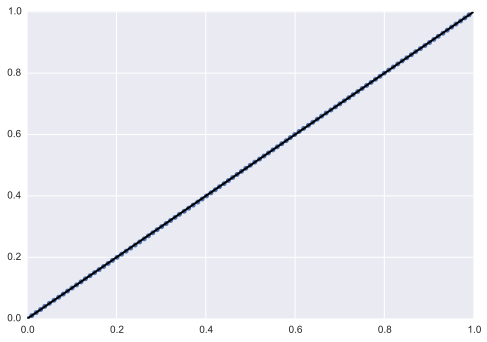

In [23]:
# Generate sorted random numbers
x = np.sort(np.random.random(100000))

# For plotting purposes, only use 100 of the samples
x_plot = x[::1000]

# Generate y-axis for CDF
y = np.arange(len(x_plot)) / len(x_plot)

# Plot CDF from random numbers
plt.plot(x_plot, y, '.', markersize=10)

# Plot expected CDF (just a straight line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1], 'k-')

So, it looks like our random number generator is doing a good job.

Generating random numbers on the uniform interval is one of the most commonly used RNG techinques.  In fact, many of the other contexts of RNG are derived from draws from the uniform distribution.  For example, you can do "coin flips," that is random draws that are either zero or one, like this:

In [33]:
# Generate 20 random numbers on uniform interval
x = np.random.random(20)

# Make them coin flips
heads = x > 0.5

# Show which were heads, and count the number of heads
print(heads)
print('\nThere were', heads.sum(), ' heads.')

[False  True False False False False False False False False False  True
 False  True  True  True False  True  True False]

There were 7  heads.


## Seeding random number generators
Now, just to demonstrate that random number generation is deterministic, we will explicitly **seed** the random number generator (usually seeded with a number representing the date/time to avoid repeats) to show that we get the same random numbers.

In [25]:
# Seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(10)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258])

In [26]:
# Re-seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(10)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258])

The random numbers are exactly the same.  If we choose a different seed, we get totally different random numbers.

In [27]:
# Seed with a number that is close to the answer to everything
np.random.seed(43)
np.random.random(10)

array([ 0.11505457,  0.60906654,  0.13339096,  0.24058962,  0.32713906,
        0.85913749,  0.66609021,  0.54116221,  0.02901382,  0.7337483 ])

If you are writing unit tests, it is often useful to seed the random number generator to get reproducible results.

## Drawing random numbers out of other distributions
We can also draw random numbers from other probability distributions.  For example, say we wanted to draw random samples from a Gaussian distribution with mean $\mu$ and standard deviation  $\sigma$.

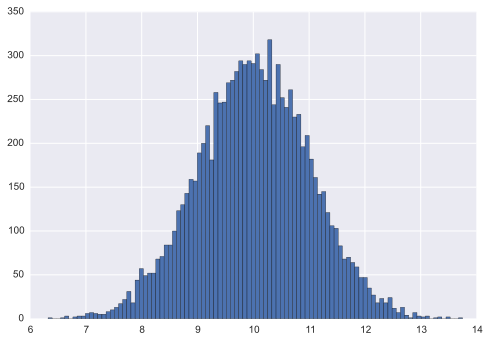

In [29]:
# Set parameters
mu = 10
sigma = 1

# Draw 10000 random samples
x = np.random.normal(mu, sigma, 10000)

# Plot a histogram of our draws
_ = plt.hist(x, bins=100)

It looks Gaussian, but let's test the mean and standard deviation. 

In [30]:
x.mean(), x.std()

(10.013895209498493, 0.99990750254092431)

Yup, mean of 10 and standard deviation of 1!

## Selections from discrete distributions
The random numbers we have generated so far from from continuous probability distributions.  We can also draw random numbers from discrete distributions.  We already showed that we can do this for "coin flips," but we can do it for other distributions as well.  Perhaps the most common example is a choice of a random integer from a set of integers.  For example, if we wanted to draw one of four integers in `{0, 1, 2, 3}`, we can use the `np.random.randint()` function.

In [35]:
# Draw random integers on [0, 4), i.e., exclusive of last one.
np.random.randint(0, 4, 20)

array([0, 0, 0, 2, 2, 3, 1, 2, 1, 2, 1, 0, 3, 3, 3, 1, 3, 1, 3, 0])

I bet you can guess where this might be useful!  We can generate random DNA sequences.

In [47]:
# Key of bases
bases = 'ATGC'

# Draw random numbers for sequence
x = np.random.randint(0, 4, 50)

# Make sequence
seq_list = [None]*50
for i, b in enumerate(x):
    seq_list[i] = bases[b]
    
# Join the sequence
''.join(seq_list)

'ATTTTTGCCCCTGGAAACGACGATGTCGCTGGTGAAGTGGATACGCGACG'

There are other discrete distributions we can draw from, such as binomial, geometric, Poisson, etc., and [the documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html) describes how to use them.

## Choosing elements from an array
It is often useful to randomly choose elements from an existing array.  The `np.random.choice()` function does this.  You equivalently could do this using `np.random.randint()`, where the integers represent indices in the array, *except* `np.random.choice()` has a great keyword argument, `replace`, which allows random draws with or without replacement.  For example, say you had 100 samples that you wanted to send to a facility for analysis, but you can only afford to send 20.  If we used `np.random.randint()`, we might have a problem.

In [50]:
np.random.randint(0, 51, 20)

array([25, 19, 12, 33, 35, 14, 48,  5, 35,  7, 46, 25, 18, 23, 39, 43, 50,
       12,  6, 29])

Sample 25 was selected twice!  We can use `np.random.choice()` instead.

In [55]:
np.random.choice(np.arange(51), 20, replace=False)

array([26, 24,  2, 43, 29, 17, 44, 23, 34, 13, 20,  1, 15, 32, 37, 42,  9,
       27,  0,  6])

## Shuffling an array
Similarly, the `np.random.permutation()` function is useful.  It takes the entries in an array and shuffles them!  Let's shuffle a deck of cards.

In [53]:
np.random.permutation(np.arange(53))

array([16,  4, 44,  3, 33, 13, 51, 43, 27, 12, 36, 24, 10, 21, 17, 46, 38,
       14, 26, 15, 50, 34, 19,  0,  7,  5, 47, 31, 11, 28, 22, 29,  9, 35,
       52, 45, 41, 39, 18, 49, 40, 48, 30, 23,  1,  6, 42,  2, 37, 25, 32,
       20,  8])

## The `random` module
Though it has far less functionality than `np.random`, the `random` module in the standard library has some useful functionality.  In particular, the `random.choice()` method can take a string as an input and choose characters out of that string.  For example, to generate random DNA sequences, we could just do the following.

In [2]:
# Make sequence
seq_list = [None]*50
for i in range(len(seq_list)):
    seq_list[i] = random.choice('ATGC')
    
# Join the sequence
''.join(seq_list)

'ACGCAAAGTGGGCCTTAAATTGTTAAGAGAGTATTGAAAACCGATTAAGA'

## When do we need RNG?
Answer: VERY OFTEN!  We will see many examples in the next lesson on Monte Carlo simulation and in the exercises.  

In many ways, probability is the language of biology.  Molecular processes have energetics that are comparable to the thermal energy, which means they are always influenced by random thermal forces.  The processes of the central dogma, including DNA replication, are no exceptions.  If we want to understand them, it is often useful to use random number generators to model the processes.

RNG also comes up A LOT in data analysis.  We'll close this lesson with a brief example.

### A bootstrap estimate for the confidence interval of a standard deviation
Let's go back to our egg cross-sectional area data again, considering the low-density feeder data.  In [Lesson 21](l21_numpy_arrays.html#So,-what-is-the-difference-between-the-two-classes-of-eggs?), we computed the median and the 25th and 75th percentiles directly from the data.  This is useful information, to be sure.  We could also have reported a mean and standard deviation.

In [54]:
# Load data
xa_low = np.loadtxt('../data/xa_low_food.csv')

# Report mean and standard deviation
print(' mean =', xa_low.mean(), ' square µm')
print('stdev =', xa_low.std(), ' square µm')

 mean = 2097.01754386  square µm
stdev = 151.738636238  square µm


If the data are Gaussian distributed, the error bar on the mean is just the standard deviation divided by the number of samples.  But what if the data are not Gaussian distributed?  And, more specifically, what if we want to compute the error bar for the standard deviation?  Yeesh.  How do we do *that*?  (Beyond that, what if we wanted to compute the 95% confidence interval on the median?  This could also be a problem directly from the data, since we have do few samples.)

Without going into the theory, the **bootstrap method** provides us a way to do this.  To get a bootstrap estimate, you do the following, assuming you have $n$ experimental measurements.

1. Choose $n$ of your experimental measurements *with replacement*.
2. Compute the statistic of interest (in this case, standard deviation) from these $n$ measurements.
3. Do this many many times, logging the values you calculate.

With your bootstrap samples, you can compute a histrogram, which will give you the probability distribution of the standard deviations.  You can the compute the confidence interval by sorting them and computing the percentiles.

In [86]:
def bootstrap_std(x, n_samples):
    """Generate bootstrap samples for the standard deviation."""
    # Number of data points, for convenience
    n = len(x)
    
    # Initialize array of standard deviations
    stds = np.empty(n_samples)
    
    # Generate samples and store results
    for i in range(n_samples):
        sample = np.random.choice(x, n, replace=True)
        stds[i] = sample.std()
        
    return stds

Now that we have our function in place, we will do 100,000 bootstrap samples of the standard deviation.

In [87]:
stds = bootstrap_std(xa_low, 100000)

We can then get the 95% confidence interval on the standard deviation by computing the percentiles.

In [88]:
# Compute confidence interval
std_conf_int = np.percentile(stds, (2.5, 50, 97.5))

# Report result
print("""
       2.5       median        97.5
       {0:.1f}    {1:.1f}          {2:.1f}
""".format(*(tuple(std_conf_int))))


       2.5       median        97.5
       120.9    149.8          178.3



So, we think the true standard deviation of the data lies between 120 and 180.
Finally, we can plot a histrogram of the bootstrap samples of the standard deviation to see what its probability distribution looks like.

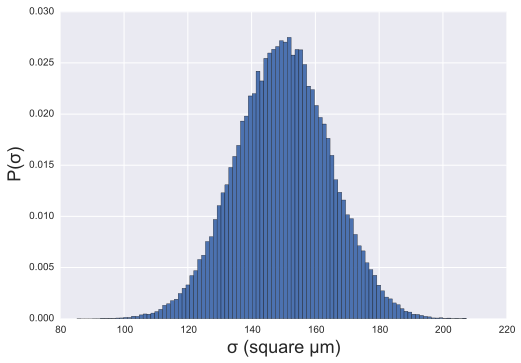

In [91]:
_ = plt.hist(stds, bins=100, normed=True)
plt.xlabel('σ (square µm)')
plt.ylabel('P(σ)')